# goal: decide whether a credit card applicant would default
# method: classification
# Metric: PR-AUC
# team collaboration: try various feature enginnering

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt

In [19]:
import csv
df = pd.read_csv('./application_data.csv')
df0 = df.copy()

In [20]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Raw data: 3e5 rows, 121 features. 

In [6]:
base_rate = df['TARGET'].sum()/df.shape[0]
base_rate

0.08072881945686496

# Base rate: 0.08 -- imbalanced data

In [7]:
df.rename(columns={'TARGET': 'y'}, inplace=True)
df

,SK_ID_CURR,y,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'columns')

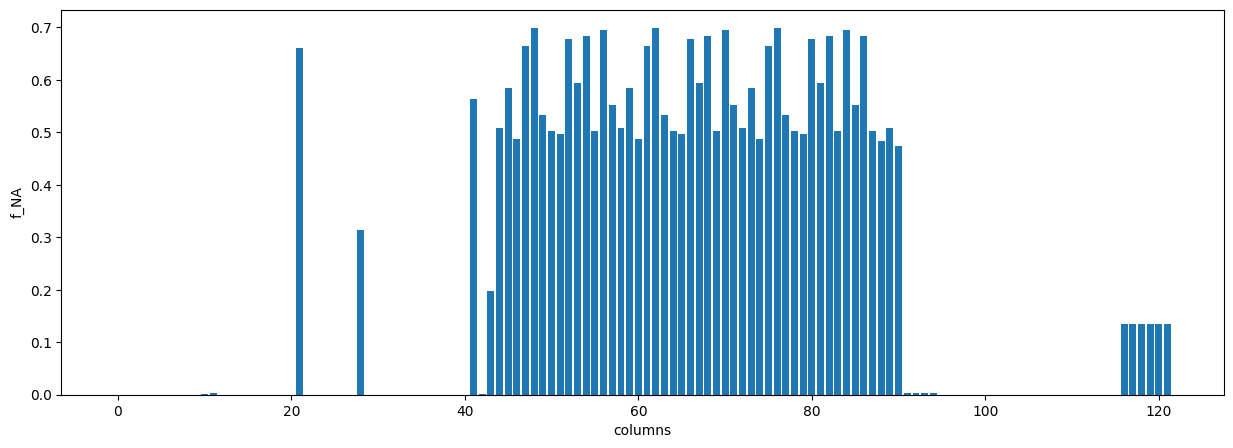

In [27]:
f_na = df.isnull().sum()/df.shape[0]
f_na
plt.figure(figsize=(15,5))
plt.bar(range(len(f_na)), f_na)
plt.ylabel('f_NA')
plt.xlabel('columns')

# Significant missing fraction

# 1. train, test split

In [8]:
#split df into train (for training and validation) and test
train, test = train_test_split(df, test_size=0.2, random_state=9)

# 2. categorize columns

In [9]:
cat_str = []
cat_nonstr = []
num_cols = []

total_num = 0
total_str = 0
total_cat_nonstr = 0
total_binary = 0

for col in df.columns:
    if df[col].value_counts().size <=2:
      #  print(col)
        total_binary += 1
    if np.dtype(df[col]) == 'int64' or np.dtype(df[col]) == 'float64':

        if df[col].value_counts().size<50:
            cat_nonstr.append(col)
            total_cat_nonstr += df[col].value_counts().size
        else:
            num_cols.append(col)
            total_num += df[col].value_counts().size
    elif np.dtype(df[col]) == 'O':
        cat_str.append(col)
        total_str += df[col].value_counts().size

cat_nonstr.remove('y')

print(len(cat_nonstr), len(cat_str), len(num_cols), ': # of raw data columns. cat_nonstr, cat_str, num\n' ) 


print('total_binary=', total_binary)
print('total_cat_nonstr=', total_cat_nonstr)
print('total_str=', total_str)
print('total_num=', total_num)


print(len(num_cols), ' numeric variables, ', total_cat_nonstr+total_str, 'categorical variables\n')

print(num_cols)
print(len(num_cols))
        
print(cat_str)
print(len(cat_str))

cat_nonstr


55 16 50 : # of raw data columns. cat_nonstr, cat_str, num

total_binary= 37
total_cat_nonstr= 590
total_str= 140
total_num= 694932
50  numeric variables,  730 categorical variables

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MED

['CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 

In [10]:
print(df0.columns[44])
print(df0.columns[90])
house_cols = df0.columns[44:91]

APARTMENTS_AVG
EMERGENCYSTATE_MODE


In [11]:
house_cols_cat_str=[]
house_cols_cat_nonstr=[]
house_cols_numeric=[]
for col in house_cols:
    if col in cat_str:
        house_cols_cat_str.append(col)
    elif col in cat_nonstr:
        house_cols_cat_nonstr.append(col)
    else:
        house_cols_numeric.append(col)
        
print(len(house_cols_cat_str))
print(len(house_cols_cat_nonstr))
print(len(house_cols_numeric))
print(len(house_cols))

4
8
35
47


In [12]:
## this is newly added in this notebook
house_cols_cat_nonstr
for col in house_cols_cat_nonstr:
    cat_nonstr.remove(col)
    num_cols.append(col)
print(len(cat_nonstr), len(cat_str), len(num_cols), ': # of raw data columns. cat_nonstr, cat_str, num\n' ) 


47 16 58 : # of raw data columns. cat_nonstr, cat_str, num



In [13]:
print(len(cat_nonstr), len(cat_str), len(num_cols), ': # of raw data columns. cat_nonstr, cat_str, num\n' ) 


47 16 58 : # of raw data columns. cat_nonstr, cat_str, num



In [14]:
num_nan_cols = []
num_nan_cols_house=[]
for col in num_cols:
    num_na = df[col].isnull().sum()
    frac_na = num_na/df.shape[0]
    if num_na>0:
        num_nan_cols.append(col)
        print(col, num_na, frac_na)
        if col in house_cols:
            num_nan_cols_house.append(col)

AMT_ANNUITY 12 3.9022994299390916e-05
AMT_GOODS_PRICE 278 0.0009040327012692228
OWN_CAR_AGE 202929 0.6599081008484249
EXT_SOURCE_1 173378 0.5638107254699832
EXT_SOURCE_2 660 0.0021462646864665006
EXT_SOURCE_3 60965 0.19825307062186392
APARTMENTS_AVG 156061 0.5074972927797705
BASEMENTAREA_AVG 179943 0.5851595552679416
YEARS_BEGINEXPLUATATION_AVG 150007 0.48781019215572774
YEARS_BUILD_AVG 204488 0.6649778381911542
COMMONAREA_AVG 214865 0.6987229725115525
ELEVATORS_AVG 163891 0.532959796560123
ENTRANCES_AVG 154828 0.503487680115508
FLOORSMAX_AVG 153020 0.4976082156410665
FLOORSMIN_AVG 208642 0.6784862980511266
LANDAREA_AVG 182590 0.5937673774271489
LIVINGAPARTMENTS_AVG 210199 0.6835495315614726
LIVINGAREA_AVG 154350 0.5019332641759157
NONLIVINGAPARTMENTS_AVG 213514 0.6943296337366793
NONLIVINGAREA_AVG 169682 0.5517916432257708
APARTMENTS_MODE 156061 0.5074972927797705
BASEMENTAREA_MODE 179943 0.5851595552679416
YEARS_BEGINEXPLUATATION_MODE 150007 0.48781019215572774
YEARS_BUILD_MODE 20448

In [15]:
house_cols_cat_str=[]
house_cols_cat_nonstr=[]
house_cols_numeric=[]
for col in house_cols:
    if col in cat_str:
        house_cols_cat_str.append(col)
    elif col in cat_nonstr:
        house_cols_cat_nonstr.append(col)
    else:
        house_cols_numeric.append(col)
        
print(len(house_cols_cat_str))
print(len(house_cols_cat_nonstr))
print(len(house_cols_numeric))
print(len(house_cols))

4
0
43
47


In [16]:
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# 3. preprocessing data: 
## Numeric data: cleaning, imputing transformers. 
## Categorical data: One- Hot Encoding

In [43]:
# build a transformer for non-house numeric variables. , put upper/lower bound on extreme outlier. 0.999 percentile.  
class NumericTransformer(object):
    def __init__(self, num_cols_to_clip=['AMT_INCOME_TOTAL',
                                         'AMT_CREDIT',
                                         'AMT_ANNUITY',
                                         'AMT_GOODS_PRICE']):
        self.num_cols_to_clip = num_cols_to_clip
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        # clip
        for col in self.num_cols_to_clip:
            X1[col] = X1[col].clip(upper = X1[col].quantile(0.999))
        #change wrong upperbound to NaN
        #col = 'DAYS_EMPLOYED'
        #X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)        
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
        

In [180]:
cols_to_impute = ['AMT_ANNUITY',  'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED'] + ext_source_cols + num_nan_cols_house

AMT_ANNUITY                          9

DAYS_LAST_PHONE_CHANGE               1
DAYS_EMPLOYED                        0

In [191]:
from sklearn.impute import SimpleImputer

class NumericImputer(object):
    def __init__(self):
        self.num_cols_to_impute_median = [#'AMT_ANNUITY', 
                                         # 'AMT_GOODS_PRICE', 
                                          'OWN_CAR_AGE',
                                         # 'DAYS_LAST_PHONE_CHANGE'
                                         ] 
        #self.impute_value_dict={}
        self.imputer={}
        
    def fit(self, X, y=None):
        X1 = X.copy()
        for col in self.num_cols_to_impute_median:
            self.imputer[col] = SimpleImputer(strategy='median', 
                                              add_indicator=True
                                             )
            self.imputer[col].fit(X1[[col]])

        for col in num_nan_cols_house:
            self.imputer[col] = SimpleImputer(strategy='constant', 
                                          fill_value=-0.3,
                                          add_indicator=True
                                             )
            self.imputer[col].fit(X1[[col]])
        ###
        col = 'DAYS_EMPLOYED'
        #first change the wrong values to nan
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)  
        self.imputer[col] = SimpleImputer(strategy='constant', 
                                          fill_value=-4000,
                                          add_indicator=True
                                             )
        self.imputer[col].fit(X1[[col]])
        ###
        fill_values_ext_source = [0.42, 0.5, 0.4]
        for i, col in enumerate(ext_source_cols):
            self.imputer[col] = SimpleImputer(strategy='constant', 
                                          fill_value= fill_values_ext_source[i],
                                          add_indicator=True
                                             )
            self.imputer[col].fit(X1[[col]])
            
    

    def transform(self, X, y=None):
        X1 = X.copy()
        X1.reset_index(drop=True, inplace=True) #!!!!!!!!!!!!!!!! need this for correct concat later
        for col in self.num_cols_to_impute_median + ext_source_cols + num_nan_cols_house:
            #X1[[col, col+'_miss']] = self.imputer[col].transform(X1[[col]])
            to_add = pd.DataFrame(self.imputer[col].transform(X1[[col]]), columns=[col, col+'_miss'])
            X1 = X1.drop([col], axis=1)
            X1 = pd.concat([X1, to_add], axis=1)          
        ###
        col = 'DAYS_EMPLOYED'
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)  
        #X1[[col, col+'_miss']] = self.imputer[col].transform(X1[[col]])
        to_add = pd.DataFrame(self.imputer[col].transform(X1[[col]]), columns=[col, col+'_miss'])
        X1 = X1.drop([col], axis=1)
        X1 = pd.concat([X1, to_add], axis=1)
        ###
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
            
        

In [173]:
model = NumericImputer()
model.fit_transform(X_train_raw)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,ELEVATORS_MEDI,ELEVATORS_MEDI_miss,ENTRANCES_MEDI,ENTRANCES_MEDI_miss,FLOORSMAX_MEDI,FLOORSMAX_MEDI_miss,FLOORSMIN_MEDI,FLOORSMIN_MEDI_miss,DAYS_EMPLOYED,DAYS_EMPLOYED_miss
0,293306,Cash loans,M,N,Y,0,315000.0,1149210.0,Family,Working,...,-0.30,1.0,-0.3000,1.0,-0.3000,1.0,-0.3000,1.0,-323.0,0.0
1,380482,Cash loans,F,Y,Y,0,90000.0,169614.0,Unaccompanied,Working,...,0.00,0.0,0.0690,0.0,0.0833,0.0,-0.3000,1.0,-157.0,0.0
2,412647,Cash loans,F,Y,N,0,180000.0,906228.0,Unaccompanied,Working,...,-0.30,1.0,-0.3000,1.0,-0.3000,1.0,-0.3000,1.0,-1330.0,0.0
3,138023,Cash loans,F,N,Y,0,90000.0,474363.0,Family,Commercial associate,...,-0.30,1.0,-0.3000,1.0,-0.3000,1.0,-0.3000,1.0,-1175.0,0.0
4,230057,Cash loans,F,N,N,0,67500.0,90000.0,Unaccompanied,Pensioner,...,0.00,0.0,0.2069,0.0,0.1667,0.0,0.2083,0.0,-4000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,205983,Cash loans,M,Y,Y,0,121500.0,269550.0,Unaccompanied,Working,...,-0.30,1.0,-0.3000,1.0,-0.3000,1.0,-0.3000,1.0,-5101.0,0.0
246004,409530,Cash loans,M,N,Y,0,180000.0,523597.5,Unaccompanied,Working,...,0.08,0.0,0.0690,0.0,0.3333,0.0,0.3750,0.0,-2926.0,0.0
246005,301440,Cash loans,F,N,Y,0,112500.0,906615.0,Unaccompanied,Commercial associate,...,0.00,0.0,0.1724,0.0,0.1667,0.0,0.2083,0.0,-1677.0,0.0
246006,327879,Cash loans,M,Y,Y,0,180000.0,900000.0,Unaccompanied,Pensioner,...,-0.30,1.0,-0.3000,1.0,-0.3000,1.0,-0.3000,1.0,-4000.0,1.0


In [129]:
# build a tranformer to one-hot encoding on cat_str, including NaN categories if existing
# note that even binary classifiers can be using one-hot encoding with drop='if_binary' feature
class CatStrEncoder(object):
    def __init__(self, input_cols=cat_str):
        self.cols = input_cols[:]
        self.ohe_dict={}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.ohe_dict[col] = OneHotEncoder(drop='if_binary', min_frequency=5e-4, handle_unknown='infrequent_if_exist')
            self.ohe_dict[col].fit(X[[col]])
        #print(self.ohe_dict)
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        X1.reset_index(drop=True, inplace=True)
        for col in self.cols:
            transformed = self.ohe_dict[col].transform(X[[col]]).toarray()
            names = list(self.ohe_dict[col].get_feature_names_out())
            to_add = pd.DataFrame(transformed, columns=names)
            X1 = pd.concat([X1, to_add], axis=1)
            X1 = X1.drop([col], axis=1)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [130]:
X_train_raw_catstr = X_train_raw[cat_str].copy()
#X_train_raw_catstr.reset_index(drop=True, inplace=True)
X_train_raw_catstr

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,NaN,SATURDAY,Kindergarten,NaN,NaN,NaN,NaN
1,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,TUESDAY,Self-employed,NaN,block of flats,"Stone, brick",No
2,Cash loans,F,Y,N,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,F,N,N,Unaccompanied,Pensioner,Higher education,Widow,House / apartment,NaN,FRIDAY,XNA,reg oper account,block of flats,Panel,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,Laborers,MONDAY,Business Entity Type 2,NaN,NaN,NaN,NaN
246004,Cash loans,M,N,Y,Unaccompanied,Working,Incomplete higher,Married,House / apartment,High skill tech staff,THURSDAY,Police,reg oper account,block of flats,"Stone, brick",No
246005,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Municipal apartment,High skill tech staff,FRIDAY,Business Entity Type 1,reg oper account,block of flats,Panel,No
246006,Cash loans,M,Y,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN


In [133]:
model = CatStrEncoder(input_cols=['NAME_CONTRACT_TYPE'])
X6 = model.fit_transform(X_train_raw_catstr)
X6.isnull().sum()


CODE_GENDER                                0
FLAG_OWN_CAR                               0
FLAG_OWN_REALTY                            0
NAME_TYPE_SUITE                         1020
NAME_INCOME_TYPE                           0
NAME_EDUCATION_TYPE                        0
NAME_FAMILY_STATUS                         0
NAME_HOUSING_TYPE                          0
OCCUPATION_TYPE                        77091
WEEKDAY_APPR_PROCESS_START                 0
ORGANIZATION_TYPE                          0
FONDKAPREMONT_MODE                    168334
HOUSETYPE_MODE                        123582
WALLSMATERIAL_MODE                    125202
EMERGENCYSTATE_MODE                   116779
NAME_CONTRACT_TYPE_Revolving loans         0
dtype: int64

In [137]:
# build a tranformer to one-hot encoding on cat_nonstr, including NaN categories if existing
# note that even binary classifiers can be using one-hot encoding with drop='if_binary' feature
class CatNonStrEncoder(object):
    def __init__(self, input_cols=cat_nonstr):
        self.cols = input_cols[:]
        self.ohe_dict={}
        
    def fit(self, X, y=None):
        X1 = X.copy()
        for col in self.cols:
            self.ohe_dict[col] = OneHotEncoder(drop='if_binary', min_frequency=5e-4, handle_unknown='infrequent_if_exist')
            self.ohe_dict[col].fit(X1[[col]])
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        X1.reset_index(drop=True, inplace=True) #!!!!!!!!
        for col in self.cols:
            transformed = self.ohe_dict[col].transform(X[[col]]).toarray()
            names = list(self.ohe_dict[col].get_feature_names_out())
            #X1[names] = transformed
            to_add = pd.DataFrame(transformed, columns=names)
            X1 = pd.concat([X1, to_add], axis=1)
            X1 = X1.drop([col], axis=1)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [161]:
cat_nonstr

['CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_RE

In [28]:
model = CatNonStrEncoder()
model.fit_transform(X_train_raw)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_YEAR_2.0,AMT_REQ_CREDIT_BUREAU_YEAR_3.0,AMT_REQ_CREDIT_BUREAU_YEAR_4.0,AMT_REQ_CREDIT_BUREAU_YEAR_5.0,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_nan,AMT_REQ_CREDIT_BUREAU_YEAR_infrequent_sklearn
0,293306,Cash loans,M,N,Y,315000.0,1149210.0,33732.0,1003500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,380482,Cash loans,F,Y,Y,90000.0,169614.0,7470.0,121500.0,Unaccompanied,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,412647,Cash loans,F,Y,N,180000.0,906228.0,42124.5,810000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,138023,Cash loans,F,N,Y,90000.0,474363.0,24966.0,409500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,230057,Cash loans,F,N,N,67500.0,90000.0,8766.0,90000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,205983,Cash loans,M,Y,Y,121500.0,269550.0,19300.5,225000.0,Unaccompanied,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246004,409530,Cash loans,M,N,Y,180000.0,523597.5,25317.0,468000.0,Unaccompanied,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246005,301440,Cash loans,F,N,Y,112500.0,906615.0,30091.5,688500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246006,327879,Cash loans,M,Y,Y,180000.0,900000.0,45954.0,900000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
X8 = X_train_raw[['AMT_CREDIT',	'AMT_ANNUITY']]
X8.isnull().sum()
model = SimpleImputer(strategy='median')
model.fit_transform(X8)

array([[1149210. ,   33732. ],
       [ 169614. ,    7470. ],
       [ 906228. ,   42124.5],
       ...,
       [ 906615. ,   30091.5],
       [ 900000. ,   45954. ],
       [  67765.5,    7245. ]])

In [264]:
class FeatureSelector(object):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [52]:
from sklearn.pipeline import Pipeline

steps_preprocess = [
    ('nt', NumericTransformer()),
    ('ni', NumericImputer()),
    ('cse', CatStrEncoder()),
    ('cnse', CatNonStrEncoder()),
]

data_prepare = Pipeline(steps_preprocess)


In [65]:
features = list(train.columns)
target = 'y'
features.remove(target)
X_train_raw = train[features]
y_train = train[target]
X_test_raw = test[features]
y_test = test[target]

X_train_raw.reset_index(drop=True, inplace=True)
X_test_raw.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
#X_test_raw.reset_index(drop=True, inplace=True)
y_train

0         0
1         0
2         0
3         0
4         0
         ..
246003    0
246004    0
246005    0
246006    0
246007    0
Name: y, Length: 246008, dtype: int64

In [54]:
X1 = data_prepare.fit_transform(X_train_raw)
X1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_ANNUITY,AMT_ANNUITY_miss,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_YEAR_2.0,AMT_REQ_CREDIT_BUREAU_YEAR_3.0,AMT_REQ_CREDIT_BUREAU_YEAR_4.0,AMT_REQ_CREDIT_BUREAU_YEAR_5.0,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_nan,AMT_REQ_CREDIT_BUREAU_YEAR_infrequent_sklearn
0,293306,315000.0,1149210.0,0.024610,-20658,-8737.0,-3363,33732.0,0.0,1003500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,380482,90000.0,169614.0,0.005313,-15033,-3647.0,-2169,7470.0,0.0,121500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,412647,180000.0,906228.0,0.008474,-9861,-2514.0,-71,42124.5,0.0,810000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,138023,90000.0,474363.0,0.005084,-16645,-4441.0,-92,24966.0,0.0,409500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,230057,67500.0,90000.0,0.018029,-23196,-11006.0,-4806,8766.0,0.0,90000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,205983,121500.0,269550.0,0.002134,-19143,-2711.0,-2621,19300.5,0.0,225000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246004,409530,180000.0,523597.5,0.024610,-15218,-3984.0,-4527,25317.0,0.0,468000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246005,301440,112500.0,906615.0,0.005313,-16059,-8158.0,-4272,30091.5,0.0,688500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246006,327879,180000.0,900000.0,0.004960,-18513,-1093.0,-2011,45954.0,0.0,900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X1.columns 
all_features = list(X1.columns )

In [58]:
X1.isnull().sum().sum()

0

## X: 405 columns after preprocessing. 

# 4.XGBoost

# 4.1 XGBoost with all 405 features,
### 12:36 start, <12:47 finish

In [248]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


use_raw_cols = X_train_raw.columns

steps = [ ('cse', CatStrEncoder()),
          ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer()),
          ('ni', NumericImputer()), 
          ('si', SimpleImputer(strategy='median')),
          #('fs', FeatureSelector(selected_features = all_features[0:1] )),
          ('scale', StandardScaler()),
          #('pca', PCA()),
         #   ('lgbm', LGBMClassifier(random_state=31, 
          #                       # verbosity=3
          #                      ))
           ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
                               ))
]

model=Pipeline(steps)


params = {  'xgb__n_estimators': [   #100, 
                                150 #200 
                               ],  #
           'xgb__learning_rate': [ #0.01, 
                                  #0.005,
                                  0.1,  
                                ],  

            'xgb__max_depth': [# 7, 
                            5, 
                            #3
                            ],  # 5 best, 2.69e10
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
   # 'lg__class_weight': [None, 
                   #      'balanced'
#                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)


/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder object at 0x2c1530160>),
                                       ('cnse',
                                        <__main__.CatNonStrEncoder object at 0x2c1530430>),
                                       ('nt',
                                        <__main__.NumericTransformer object at 0x2c1532b30>),
                                       ('ni',
                                        <__main__.NumericImputer object at 0x15fe9e140>),
                                       ('si', SimpleImputer(strat...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=31, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1], 'xgb__max_depth': [5],
                         'xgb__n_estimators': [150]},
             scoring='average_precision')

In [249]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.243


In [250]:
grid.best_params_

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 150}

In [252]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

0.23363667088445556 0.7539757518889016


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.234')

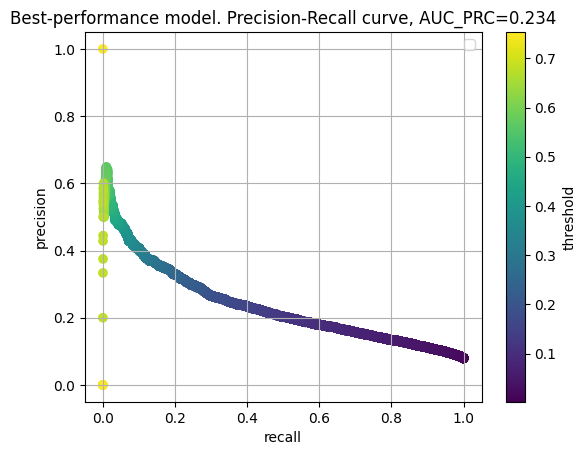

In [256]:
fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. test_AUC_PRC=0.234')

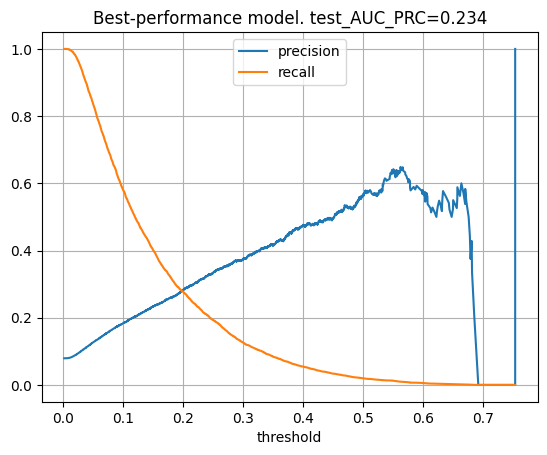

In [258]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. test_AUC_PRC=' + str(round(auc_prc,3)) )

In [253]:
feature_names = grid.best_estimator_['si'].feature_names_in_
feature_importances = grid.best_estimator_['xgb'].feature_importances_

feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table


,column_names,importances,abs_importances,cumsum
315,EXT_SOURCE_3,0.032465,0.032465,0.032465
27,NAME_INCOME_TYPE_Working,0.029324,0.029324,0.061789
313,EXT_SOURCE_2,0.023187,0.023187,0.084976
12,CODE_GENDER_M,0.021754,0.021754,0.106729
365,APARTMENTS_MEDI,0.019168,0.019168,0.125898
...,...,...,...,...
235,OBS_60_CNT_SOCIAL_CIRCLE_14.0,0.000000,0.000000,1.000000
236,OBS_60_CNT_SOCIAL_CIRCLE_15.0,0.000000,0.000000,1.000000
237,OBS_60_CNT_SOCIAL_CIRCLE_nan,0.000000,0.000000,1.000000
238,OBS_60_CNT_SOCIAL_CIRCLE_infrequent_sklearn,0.000000,0.000000,1.000000


In [254]:
#feature_importance_table.to_csv('feature_importances_from_xgboost_405.csv', index=False)

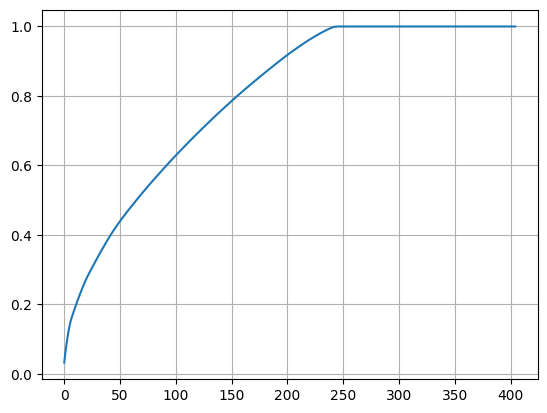

In [255]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

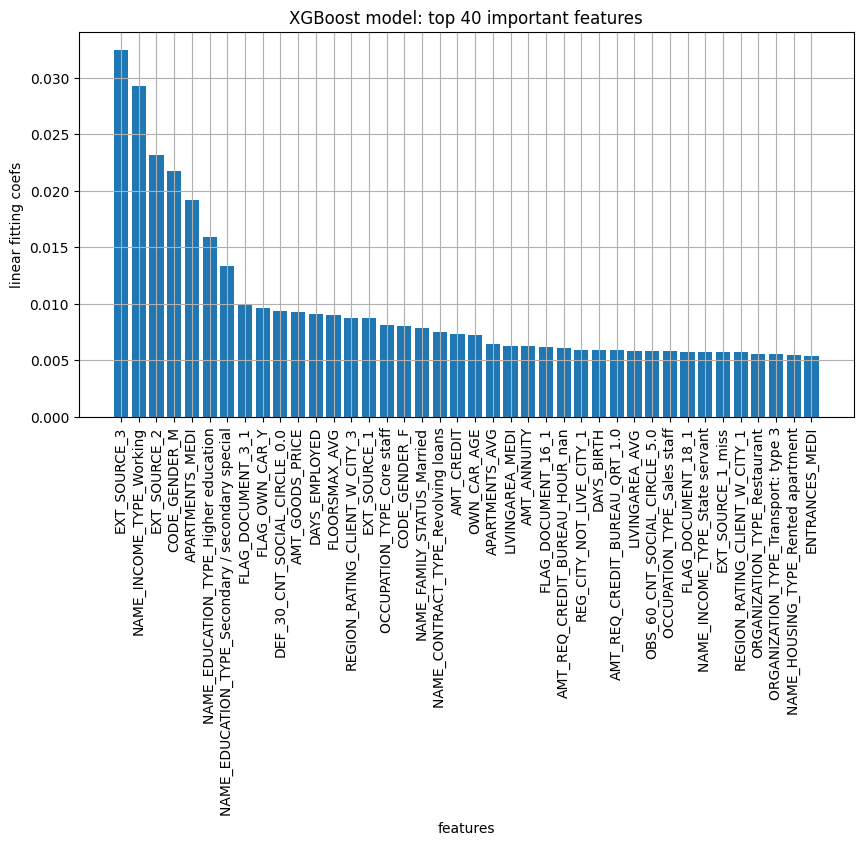

In [260]:
plt.figure(figsize=(10,5))
n_show = 40
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('XGBoost model: top '+ str(n_show) + ' important features')
plt.grid()

# 4.2 XGBoost with top self-selected features.   top10- 1:23

In [271]:
feature_importance_xgboost = pd.read_csv('feature_importances_from_xgboost_405.csv')
#feature_importance_xgboost


['EXT_SOURCE_3']

In [310]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

selected_features = list(feature_importance_xgboost.column_names[0:80])

use_raw_cols = X_train_raw.columns


steps = [ ('cse', CatStrEncoder()),
          ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer()),
          ('ni', NumericImputer()), 
          ('fs', FeatureSelector(selected_features = selected_features )),
          ('si', SimpleImputer(strategy='median')),
          ('scale', StandardScaler()),
          #('pca', PCA()),
         #   ('lgbm', LGBMClassifier(random_state=31, 
          #                       # verbosity=3
          #                      ))
           ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
                               ))
]

model=Pipeline(steps)


params = {  'xgb__n_estimators': [   #100, 
                                150 #200 
                               ],  #
           'xgb__learning_rate': [ #0.01, 
                                  #0.005,
                                  0.1,  
                                ],  

            'xgb__max_depth': [# 7, 
                            5, 
                            #3
                            ],  # 5 best, 2.69e10
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
   # 'lg__class_weight': [None, 
                   #      'balanced'
#                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)


/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder object at 0x2f2ac3700>),
                                       ('cnse',
                                        <__main__.CatNonStrEncoder object at 0x176d348b0>),
                                       ('nt',
                                        <__main__.NumericTransformer object at 0x176d376a0>),
                                       ('ni',
                                        <__main__.NumericImputer object at 0x176d36ec0>),
                                       ('fs',
                                        <__main__.FeatureSe...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=31, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1], 'xgb__max_depth': [5],
                         'xgb__n_estimators': [150]},
             scoring='average_precision')

In [311]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.243


In [312]:
grid.best_params_

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 150}

In [313]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

0.2322607280810526 0.7533277347758621


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.232')

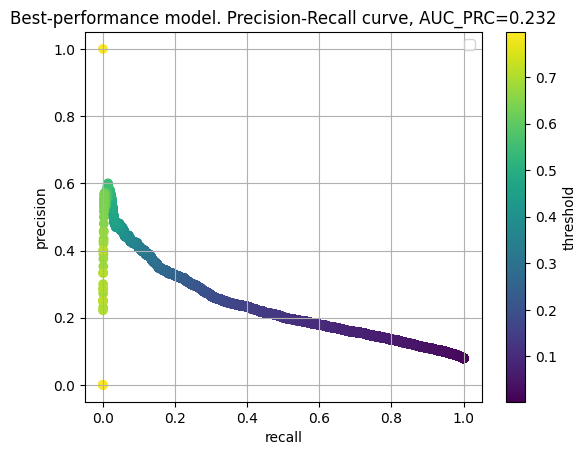

In [315]:
fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. test_AUC_PRC=0.232')

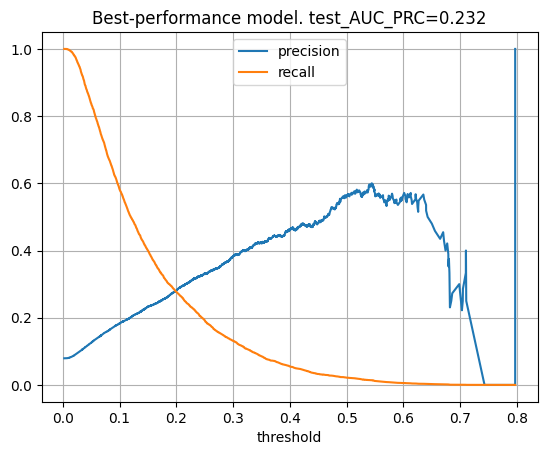

In [316]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. test_AUC_PRC=' + str(round(auc_prc,3)) )

In [317]:
feature_names = grid.best_estimator_['si'].feature_names_in_
feature_importances = grid.best_estimator_['xgb'].feature_importances_

feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table


,column_names,importances,abs_importances,cumsum
0,EXT_SOURCE_3,0.068301,0.068301,0.068301
2,EXT_SOURCE_2,0.052126,0.052126,0.120427
5,NAME_EDUCATION_TYPE_Higher education,0.039426,0.039426,0.159853
3,CODE_GENDER_M,0.031015,0.031015,0.190868
6,NAME_EDUCATION_TYPE_Secondary / secondary special,0.025975,0.025975,0.216843
...,...,...,...,...
65,HOUR_APPR_PROCESS_START_10,0.004756,0.004756,0.988525
71,OBS_60_CNT_SOCIAL_CIRCLE_4.0,0.004626,0.004626,0.993152
63,FONDKAPREMONT_MODE_org spec account,0.003807,0.003807,0.996959
38,NAME_HOUSING_TYPE_Rented apartment,0.003041,0.003041,1.000000


In [318]:
#feature_importance_table.to_csv('feature_importances_from_xgboost_405.csv', index=False)

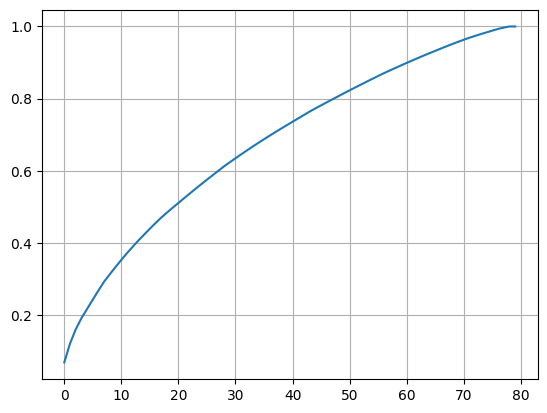

In [319]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

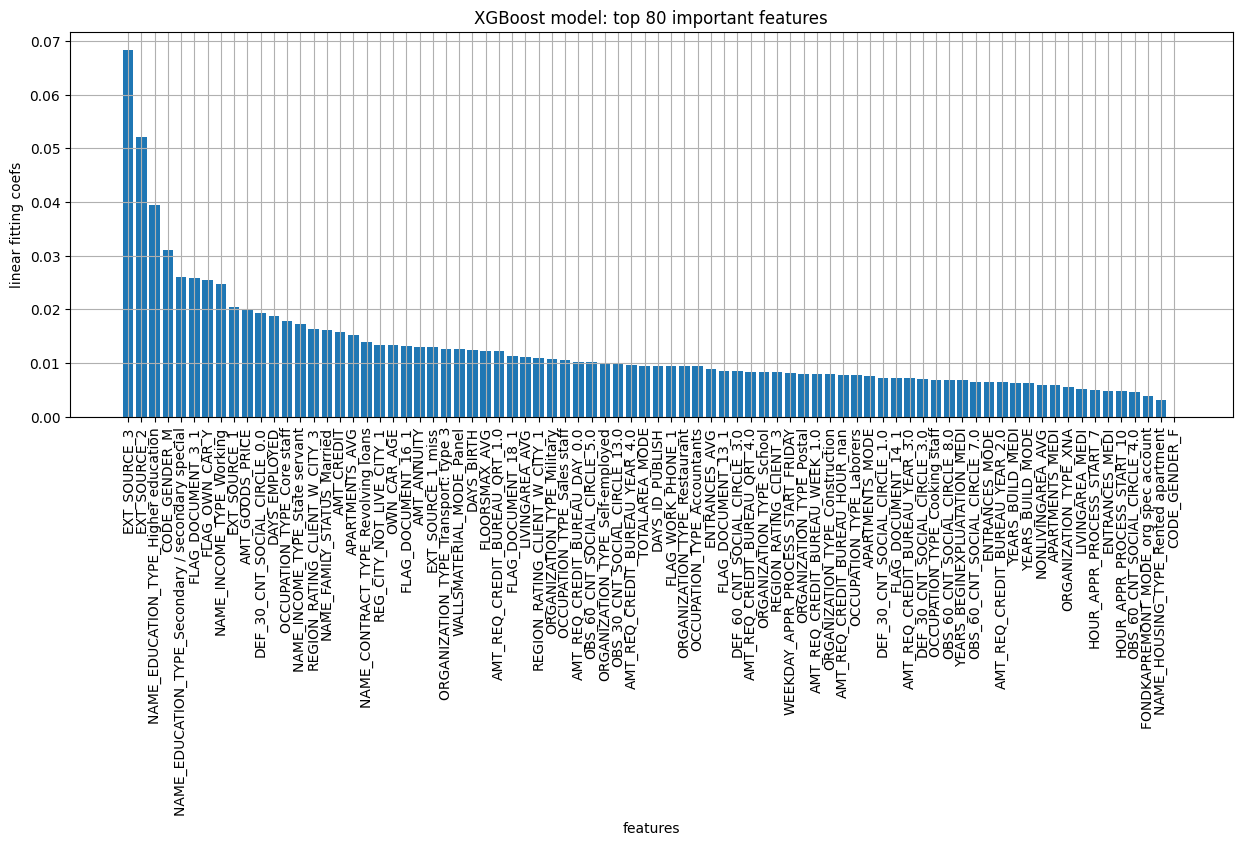

In [321]:
plt.figure(figsize=(15,5))
n_show = 80
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('XGBoost model: top '+ str(n_show) + ' important features')
plt.grid()

# 5. LightGBM model, all 405. 1:52 - 1:54  ~ 0.2 times XGboost

In [323]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


use_raw_cols = X_train_raw.columns

steps = [ ('cse', CatStrEncoder()),
          ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer()),
          ('ni', NumericImputer()), 
          ('si', SimpleImputer(strategy='median')),
          #('fs', FeatureSelector(selected_features = all_features[0:1] )),
          ('scale', StandardScaler()),
          #('pca', PCA()),
          ('lgbm', LGBMClassifier(random_state=31, 
          #                       # verbosity=3
                             ))
          # ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
           #                    ))
]

model=Pipeline(steps)


params = {  'lgbm__n_estimators': [   #100, 
                                150 #200 
                               ],  #
           'lgbm__learning_rate': [ #0.01, 
                                  #0.005,
                                  0.1,  
                                ],  

            'lgbm__max_depth': [# 7, 
                            5, 
                            #3
                            ],  # 5 best, 2.69e10
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
   # 'lg__class_weight': [None, 
                   #      'balanced'
#                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)


/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder object at 0x2e699b700>),
                                       ('cnse',
                                        <__main__.CatNonStrEncoder object at 0x2e6999a80>),
                                       ('nt',
                                        <__main__.NumericTransformer object at 0x2e699b0a0>),
                                       ('ni',
                                        <__main__.NumericImputer object at 0x2e6998c10>),
                                       ('si', SimpleImputer(strategy='median')),
                                       ('scale', StandardScaler()),
                                       ('lgbm',
                                        LGBMClassifier(random_state=31))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.1], 'lgbm__max_depth': [5],
                         'lgbm__n_estimators': [150]},
             scoring='average_precision')

In [324]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.243


In [325]:
grid.best_params_

{'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 150}

In [326]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

0.2326270601002969 0.7532096461494012


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.233')

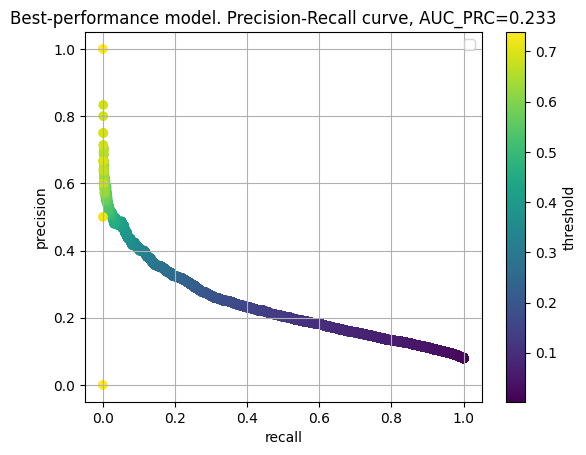

In [327]:
fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. test_AUC_PRC=0.233')

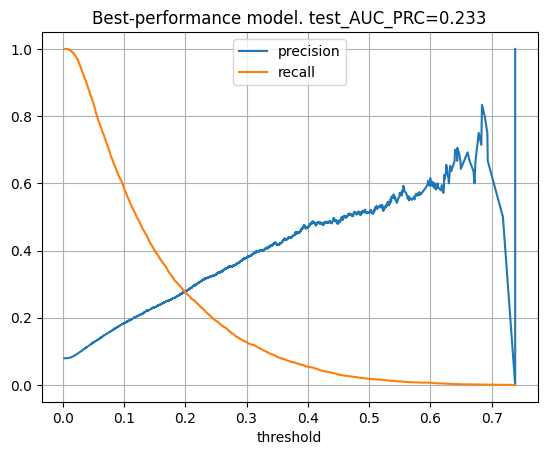

In [328]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. test_AUC_PRC=' + str(round(auc_prc,3)) )

In [330]:
feature_names = grid.best_estimator_['si'].feature_names_in_
feature_importances = grid.best_estimator_['lgbm'].feature_importances_

feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table


,column_names,importances,abs_importances,cumsum
315,EXT_SOURCE_3,284,284,0.071411
313,EXT_SOURCE_2,277,277,0.141061
311,EXT_SOURCE_1,256,256,0.205431
6,DAYS_BIRTH,177,177,0.249937
3,AMT_ANNUITY,172,172,0.293186
...,...,...,...,...
132,HOUSETYPE_MODE_nan,0,0,1.000000
287,AMT_REQ_CREDIT_BUREAU_MON_9.0,0,0,1.000000
288,AMT_REQ_CREDIT_BUREAU_MON_nan,0,0,1.000000
289,AMT_REQ_CREDIT_BUREAU_MON_infrequent_sklearn,0,0,1.000000


In [331]:
#feature_importance_table.to_csv('feature_importances_from_lgbm_405.csv', index=False)

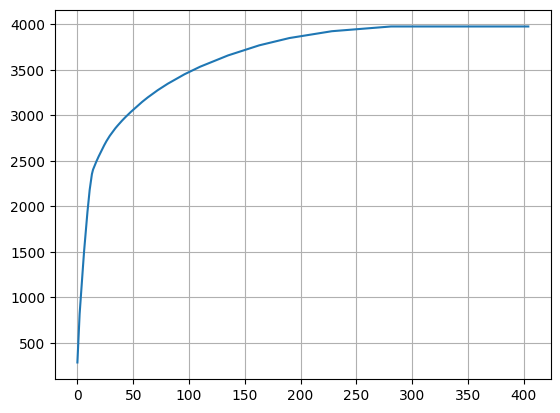

In [333]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

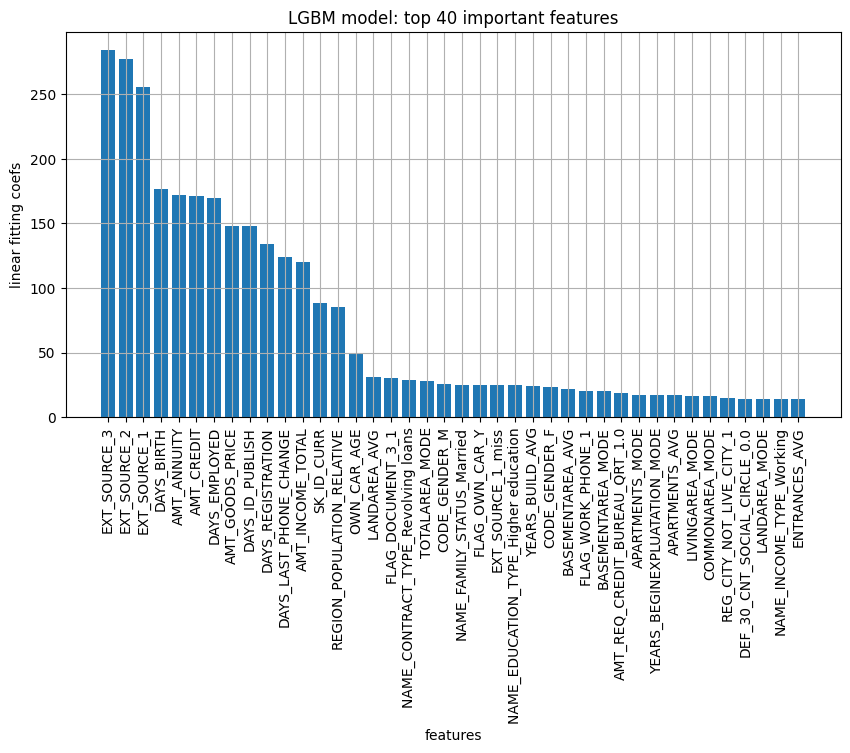

In [334]:
plt.figure(figsize=(10,5))
n_show = 40
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('LGBM model: top '+ str(n_show) + ' important features')
plt.grid()

# 5.2 LGBM with self-selected features

In [481]:
feature_importance_lgbm= pd.read_csv('feature_importances_from_lgbm_405.csv')


In [551]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


selected_features = list(feature_importance_lgbm.column_names[0:80])
use_raw_cols = X_train_raw.columns

steps = [ ('cse', CatStrEncoder()),
          ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer()),
          ('ni', NumericImputer()), 
          ('fs', FeatureSelector(selected_features = selected_features )),
          ('si', SimpleImputer(strategy='median')),
         # ('scale', StandardScaler()),
         # ('pca', PCA(n_components=80)),
          ('lgbm', LGBMClassifier(random_state=31, 
                                 # is_unbalance = True
          #                       # verbosity=3
                             ))
          # ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
           #                    ))
]

model=Pipeline(steps)


params = {  'lgbm__n_estimators': [   #100, 
                                150 #200 
                               ],  #
           'lgbm__learning_rate': [ #0.01, 
                                  #0.05,
                                  0.1,  
                                ],  

            'lgbm__max_depth': [ #7, 
                            5, 
                            #3
                            ],  # 5 best, 2.69e10
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
   # 'lg__class_weight': [None, 
                   #      'balanced'
#                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)


/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder object at 0x2f3154130>),
                                       ('cnse',
                                        <__main__.CatNonStrEncoder object at 0x2e3e4ef80>),
                                       ('nt',
                                        <__main__.NumericTransformer object at 0x287ec0880>),
                                       ('ni',
                                        <__main__.NumericImputer object at 0x2c1528310>),
                                       ('fs',
                                        <__main__.FeatureSelector object at 0x2c1528100>),
                                       ('si', SimpleImputer(strategy='median')),
                                       ('lgbm',
                                        LGBMClassifier(random_state=31))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.1], 'lgbm__max_depth': [5],
                         'lgbm__n_estimators': [150]},
             scoring='average_precision')

In [552]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.243


In [553]:
grid.best_params_

{'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 150}

In [554]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

0.23395755651411798 0.7536505067311152


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.234')

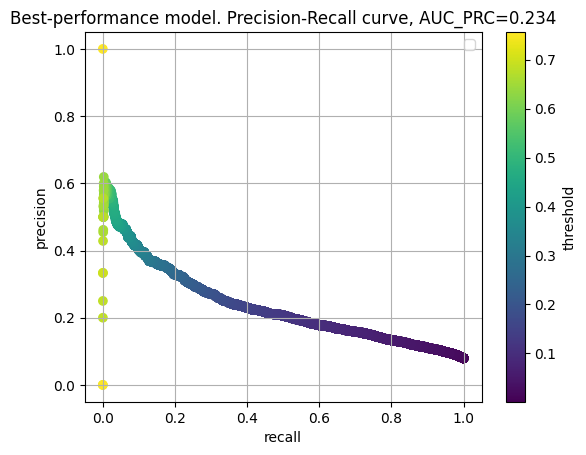

In [555]:
fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. test_AUC_PRC=0.234')

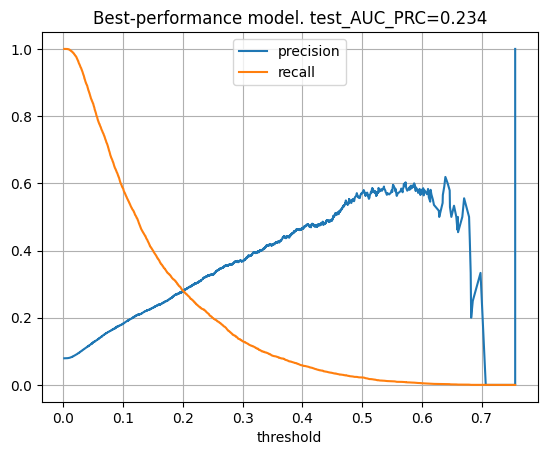

In [556]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. test_AUC_PRC=' + str(round(auc_prc,3)) )

In [557]:
feature_names = grid.best_estimator_['si'].feature_names_in_
feature_importances = grid.best_estimator_['lgbm'].feature_importances_

feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table


,column_names,importances,abs_importances,cumsum
0,EXT_SOURCE_3,300,300,0.072429
2,EXT_SOURCE_1,294,294,0.143409
1,EXT_SOURCE_2,292,292,0.213906
3,DAYS_BIRTH,243,243,0.272574
4,AMT_ANNUITY,204,204,0.321825
...,...,...,...,...
58,NAME_TYPE_SUITE_Family,8,8,0.995171
70,DEF_60_CNT_SOCIAL_CIRCLE_3.0,7,7,0.996861
78,CNT_FAM_MEMBERS_3.0,7,7,0.998551
66,HOUR_APPR_PROCESS_START_12,3,3,0.999276


In [499]:
#feature_importance_table.to_csv('feature_importances_from_lgbm_405.csv', index=False)

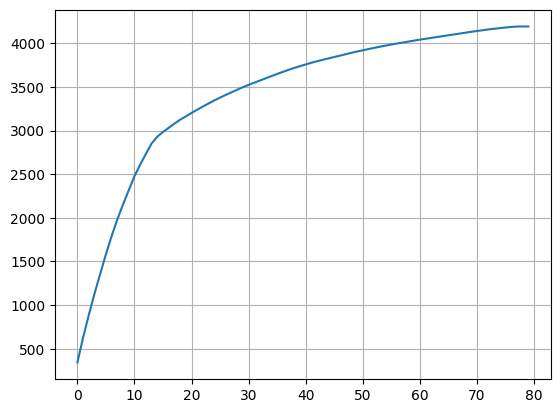

In [490]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

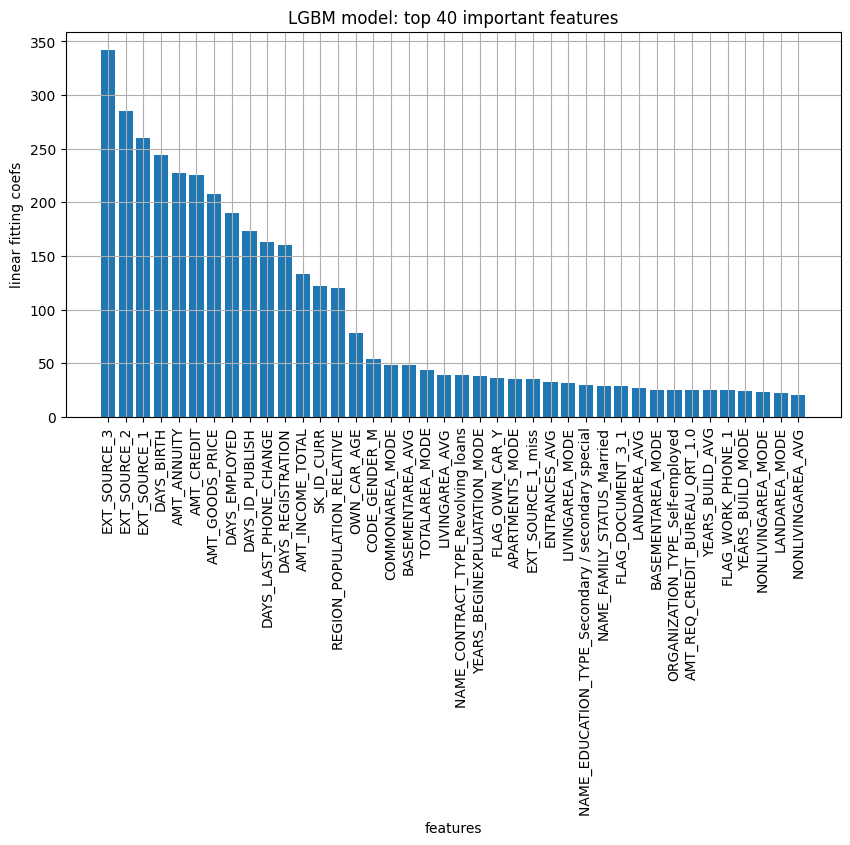

In [491]:
plt.figure(figsize=(10,5))
n_show = 40
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('LGBM model: top '+ str(n_show) + ' important features')
plt.grid()

In [468]:
y_train_proba = grid.predict_proba(X_train_raw)
y_train_proba1 = y_train_proba[ :, 1 ]
y_test_proba1
y_train_proba1
#lgbm array([0.09530684, 0.06416748, 0.0717414 , ..., 0.02228141, 0.03052307,
      # 0.01025456])
# lg: array([0.08614957, 0.05414671, 0.07489803, ..., 0.03580656, 0.02530058,
      # 0.02005364])

array([0.08614957, 0.05414671, 0.07489803, ..., 0.03580656, 0.02530058,
       0.02005364])

# 6. HistGB: can natively handle NaN. 

In [566]:
# build a transformer for non-house numeric variables. , put upper/lower bound on extreme outlier. 0.999 percentile.  
class NumericTransformer_1(object):
    def __init__(self, num_cols_to_clip=['AMT_INCOME_TOTAL',
                                         'AMT_CREDIT',
                                         'AMT_ANNUITY',
                                         'AMT_GOODS_PRICE']):
        self.num_cols_to_clip = num_cols_to_clip
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        # clip
        for col in self.num_cols_to_clip:
            X1[col] = X1[col].clip(upper = X1[col].quantile(0.999))
        #change wrong upperbound to NaN
        col = 'DAYS_EMPLOYED'
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)        
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [571]:
# build a tranformer to one-hot encoding on cat_str, including NaN categories if existing
# note that even binary classifiers can be using one-hot encoding with drop='if_binary' feature
from sklearn.preprocessing import OrdinalEncoder

class CatStrEncoder_1(object):
    def __init__(self, input_cols=cat_str):
        self.cols = input_cols[:]
        self.ohe_dict={}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.ohe_dict[col] = OneHotEncoder(drop='if_binary', min_frequency=5e-4, handle_unknown='infrequent_if_exist')
            self.ohe_dict[col].fit(X[[col]])
        #print(self.ohe_dict)
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        X1.reset_index(drop=True, inplace=True)
        for col in self.cols:
            transformed = self.ohe_dict[col].transform(X[[col]]).toarray()
            names = list(self.ohe_dict[col].get_feature_names_out())
            to_add = pd.DataFrame(transformed, columns=names)
            X1 = pd.concat([X1, to_add], axis=1)
            X1 = X1.drop([col], axis=1)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [587]:
## ordinal encoder for cat_str
class CatStrEncoder_2(object):
    def __init__(self, input_cols=cat_str):
        self.cols = input_cols[:]
        self.oe_dict={}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.oe_dict[col] = OrdinalEncoder( min_frequency=5e-4, 
                                               handle_unknown='use_encoded_value', 
                                               unknown_value = -1)
            self.oe_dict[col].fit(X[[col]])
        #print(self.ohe_dict)
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        X1.reset_index(drop=True, inplace=True)
        for col in self.cols:
            X1[col] = self.oe_dict[col].transform(X[[col]])#.toarray()
          #  names = list(self.oe_dict[col].get_feature_names_out())
           # to_add = pd.DataFrame(transformed, columns=names)
            #X1 = pd.concat([X1, to_add], axis=1)
            #X1 = X1.drop([col], axis=1)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [609]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier


use_raw_cols = X_train_raw.columns

steps = [ ('cse', CatStrEncoder_2()),
         # ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer_1()),
          #('ni', NumericImputer()), 
         # ('si', SimpleImputer(strategy='median')),
          #('fs', FeatureSelector(selected_features = all_features[0:1] )),
         # ('scale', StandardScaler()),
          #('pca', PCA()),
          ('hgb', HistGradientBoostingClassifier(random_state=31, 
                                                 class_weight = 'balanced',
                                                categorical_features = cat_str 
          #                       # verbosity=3
                             ))
          # ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
           #                    ))
]

model=Pipeline(steps)


params = { 
           'hgb__learning_rate': [ #0.01, 
                                 # 0.05,
                                 # 0.1,  
                                  0.2,
                                 # 0.3
                                ],  

            'hgb__max_depth': [
                           # 5,
                            3,
                           #2,
                           # None
                            ],  # 5 best, 2.69e10
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
   # 'lg__class_weight': [None, 
                   #      'balanced'
#                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder_2 object at 0x31e338d60>),
                                       ('nt',
                                        <__main__.NumericTransformer_1 object at 0x31e5670d0>),
                                       ('hgb',
                                        HistGradientBoostingClassifier(categorical_features=['NAME_CONTRACT_TYPE',
                                                                                             'CODE_GENDER',
                                                                                             'FLAG_OWN_CAR',
                                                                                             'FLAG_OWN_REALTY',
                                                                                             '...
                                                                                             'NAME_EDUCATION_TYPE',
                                                                                             'NAME_FAMILY_STATUS',
                                                                                             'NAME_HOUSING_TYPE',
                                                                                             'OCCUPATION_TYPE',
                                                                                             'WEEKDAY_APPR_PROCESS_START',
                                                                                             'ORGANIZATION_TYPE',
                                                                                             'FONDKAPREMONT_MODE',
                                                                                             'HOUSETYPE_MODE',
                                                                                             'WALLSMATERIAL_MODE',
                                                                                             'EMERGENCYSTATE_MODE'],
                                                                       class_weight='balanced',
                                                                       random_state=31))]),
             n_jobs=-1,
             param_grid={'hgb__learning_rate': [0.2], 'hgb__max_depth': [3]},
             scoring='average_precision')

In [610]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.238


In [611]:
grid.best_params_

{'hgb__learning_rate': 0.2, 'hgb__max_depth': 3}

In [612]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

0.22795313374047796 0.7520151926023233


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.228')

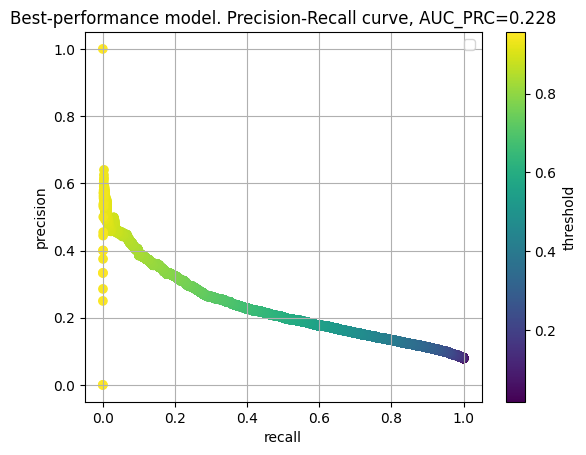

In [613]:
fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. test_AUC_PRC=0.229')

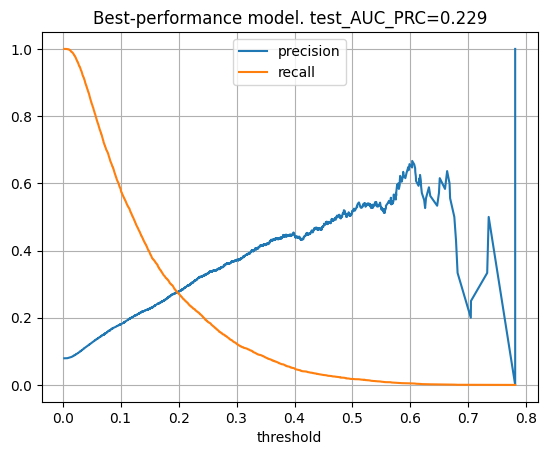

In [608]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. test_AUC_PRC=' + str(round(auc_prc,3)) )

In [598]:
feature_names = grid.best_estimator_['hgb'].feature_names_in_
feature_names.shape

(121,)

In [586]:
feature_names = grid.best_estimator_['hgb'].feature_names_in_
feature_importances = grid.best_estimator_['hgb'].feature_importances_

feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table


AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

In [331]:
#feature_importance_table.to_csv('feature_importances_from_lgbm_405.csv', index=False)

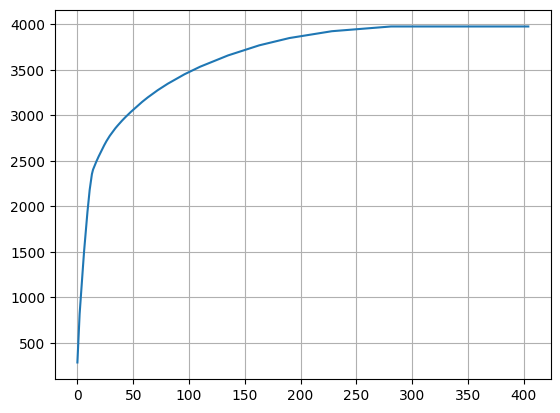

In [333]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

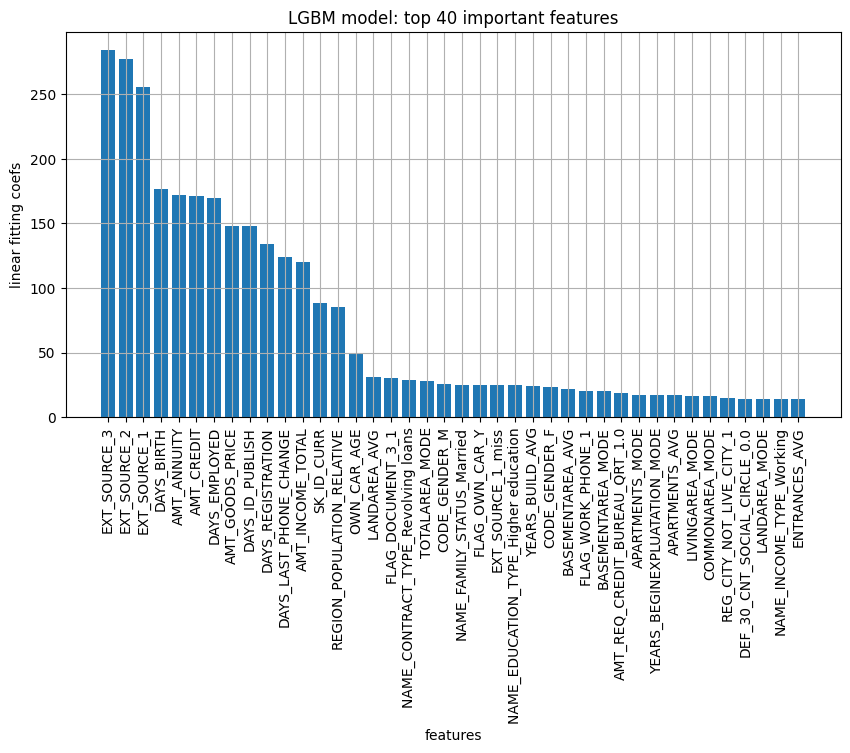

In [334]:
plt.figure(figsize=(10,5))
n_show = 40
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('LGBM model: top '+ str(n_show) + ' important features')
plt.grid()

# 7. logistic regression model. 405 features.  2:37 starts, <2:41 finshes

In [184]:
#cat_nonstr + cat_str
#X_train_raw[cols_to_impute].isnull().sum()


In [459]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

use_raw_cols = X_train_raw.columns

steps = [ ('cse', CatStrEncoder()),
          ('cnse', CatNonStrEncoder()),
          ('nt', NumericTransformer()),
          ('ni', NumericImputer()), ### this is where the problem is!  
          ('si', SimpleImputer(strategy='median')),
          #('fs', FeatureSelector(selected_features = all_features[0:1] )),
          ('scale', StandardScaler()),
          #('pca', PCA()),
         ('lg', LogisticRegression(random_state=15, n_jobs=-1, max_iter=200)),
]

model=Pipeline(steps)


params = {
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    #'lg__C': [ 1e-3, 1e-2, 1e-1, 1 ],
    'lg__class_weight': [None, 
                   #      'balanced'
                        ],
   # 'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 3
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(estimator = model, 
                  param_grid = params , 
                  cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1,
                  error_score='raise',
                  refit = True # default is true
                 )


grid.fit(X_train_raw[use_raw_cols], y_train)



/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cse',
                                        <__main__.CatStrEncoder object at 0x30683b910>),
                                       ('cnse',
                                        <__main__.CatNonStrEncoder object at 0x30192ee00>),
                                       ('nt',
                                        <__main__.NumericTransformer object at 0x30192f7f0>),
                                       ('ni',
                                        <__main__.NumericImputer object at 0x30192fa60>),
                                       ('si', SimpleImputer(strategy='median')),
                                       ('scale', StandardScaler()),
                                       ('lg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1,
                                                           random_state=15))]),
             n_jobs=-1, param_grid={'lg__class_weight': [None]},
             scoring='average_precision')

In [460]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())

cv_results.mean_test_score.max(): 0.230


In [461]:
grid.best_params_

{'lg__class_weight': None}

In [462]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test_raw[use_cols])

y_test_proba = grid.predict_proba(X_test_raw[use_cols])
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn

0.21565424622951135 0.7422536307066159


In [463]:
feature_names = grid.best_estimator_['si'].feature_names_in_
feature_importances = grid.best_estimator_['lg'].coef_[0]
feature_importance_table = pd.DataFrame({'column_names': feature_names, 
                                      'importances': feature_importances,
                                     'abs_importances': abs(feature_importances) })
feature_importance_table.sort_values(by='abs_importances', ascending=False, inplace=True)
cumsum = np.cumsum(feature_importance_table.abs_importances)
feature_importance_table['cumsum'] = cumsum/cumsum.max()
feature_importance_table

,column_names,importances,abs_importances,cumsum
4,AMT_GOODS_PRICE,-1.006690,1.006690,0.064134
2,AMT_CREDIT,0.912989,0.912989,0.122298
315,EXT_SOURCE_3,-0.505262,0.505262,0.154487
313,EXT_SOURCE_2,-0.378535,0.378535,0.178602
25,NAME_INCOME_TYPE_Pensioner,-0.358114,0.358114,0.201417
...,...,...,...,...
135,WALLSMATERIAL_MODE_Monolithic,-0.000220,0.000220,0.999979
220,DEF_30_CNT_SOCIAL_CIRCLE_infrequent_sklearn,0.000153,0.000153,0.999989
177,HOUR_APPR_PROCESS_START_10,0.000071,0.000071,0.999993
183,HOUR_APPR_PROCESS_START_16,-0.000068,0.000068,0.999997


In [464]:
#feature_importance_table.to_csv('feature_importances_from_lg_405.csv', index=False)

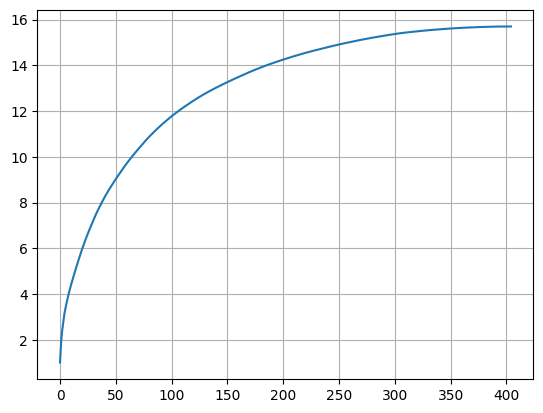

In [465]:
plt.plot(range(len(cumsum)), cumsum)
plt.grid()

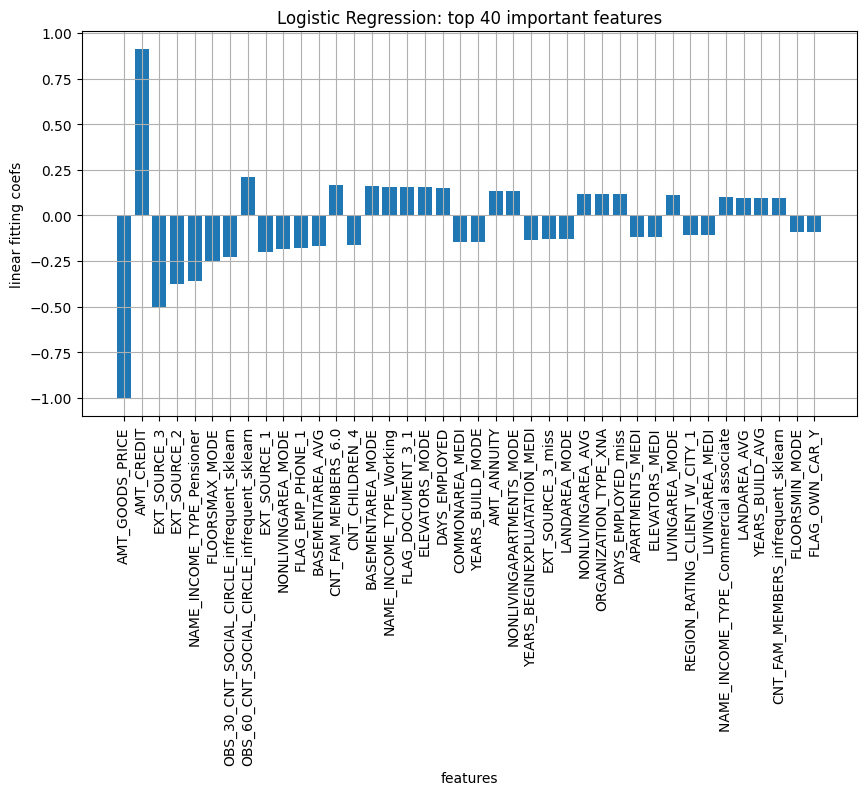

In [466]:
plt.figure(figsize=(10,5))
n_show = 40
plt.bar(range(n_show), feature_importance_table.importances[:n_show] )
plt.xticks(range(n_show), feature_importance_table.column_names[:n_show], rotation=90)
plt.ylabel('linear fitting coefs')
plt.xlabel('features')
plt.title('Logistic Regression: top '+ str(n_show) + ' important features')
plt.grid()

In [ ]:
# 8. Compare models

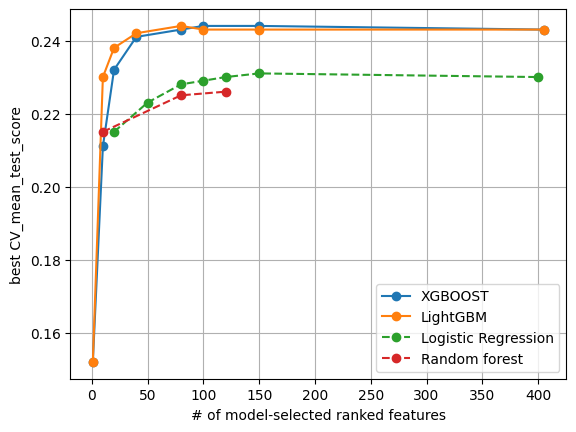

In [28]:
import numpy as np
import matplotlib.pylab as plt
result = np.loadtxt('xgboost.txt', unpack=True)
result
plt.plot(result[0], result[1], marker='o', label='XGBOOST')
result = np.loadtxt('lgbm.txt', unpack=True)
result
plt.plot(result[0], result[1], marker='o', label='LightGBM')

result = np.loadtxt('lg.txt', unpack=True)
result
plt.plot(result[0], result[1], ls='--', marker='o', label='Logistic Regression')

result = np.loadtxt('rf.txt', unpack=True)
result
plt.plot(result[0], result[1], ls='--', marker='o', label='Random forest')

plt.xlabel('# of model-selected ranked features')
plt.ylabel('best CV_mean_test_score')
plt.legend()
plt.grid()

# LightGBM with top 80 self-selected features is the best, based on PR_AUC score.